# Algae Bloom Data Investigation
https://msoese.atlassian.net/browse/WABS-23

In [184]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [185]:
# Read in the data set
df = pd.read_csv("../../data/cleaned/site1_vineyard.csv")
df.dtypes

Date (mm.dd.yyyy)       object
Time 24hr               object
Temp C                 float64
Sp Cond (uS/cm)          int64
pH (mV)                float64
pH                     float64
Turbidity (NTU)        float64
Chlorophyll (ug/L)     float64
Chlorophyll RFU        float64
ODOSat%                float64
ODO (mg/L)             float64
BGA-Phycocyanin RFU    float64
dtype: object

In [186]:
# Create a new column categorizing an algae bloom above an RFU threshhold 
df["bloom"] = df["BGA-Phycocyanin RFU"].apply(lambda x: 1 if x >= 1.0 else 0)
df["bloom"] = df["bloom"].astype("bool")
df['Sp Cond (uS/cm)'] = df['Sp Cond (uS/cm)'].astype('float64')
df.describe()

,Temp C,Sp Cond (uS/cm),pH (mV),pH,Turbidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU
count,18947.000000,18947.000000,18947.000000,18947.000000,18947.000000,18947.000000,18947.00000,18947.000000,18947.000000,18947.000000
mean,18.488235,1933.564575,-116.806951,8.633415,58.129348,9.494712,2.62507,87.056980,8.179008,0.979511
std,6.134464,151.800551,8.973830,0.147231,54.622278,6.464266,1.70465,13.793755,1.278416,0.731423
min,5.630000,3.000000,-153.700000,7.930000,0.660000,-0.300000,0.00000,62.800000,5.170000,0.000000
25%,12.700000,1848.000000,-120.800000,8.530000,29.850000,4.700000,1.40000,80.000000,7.260000,0.500000
50%,20.320000,1939.000000,-115.700000,8.650000,42.140000,8.200000,2.30000,83.200000,8.080000,0.900000
75%,23.630000,2070.000000,-112.100000,8.700000,65.795000,12.300000,3.40000,88.900000,9.250000,1.200000
max,28.570000,2164.000000,-76.500000,9.230000,636.700000,102.000000,27.00000,209.700000,16.170000,16.100000


In [187]:
# Add a single datetime column
df["Date (mm.dd.yyyy)"] = pd.to_datetime(df["Date (mm.dd.yyyy)"], format='%m/%d/%Y')
df["datetime"] = df["Date (mm.dd.yyyy)"].astype('str') + " " + df["Time 24hr"]
df["datetime"] = pd.to_datetime(df["datetime"])
df.head()

,Date (mm.dd.yyyy),Time 24hr,Temp C,Sp Cond (uS/cm),pH (mV),pH,Turbidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU,bloom,datetime
0,2017-05-05,0:00,15.02,1848.0,-100.1,8.36,16.84,4.4,1.3,90.2,9.04,0.4,False,2017-05-05 00:00:00
1,2017-05-05,0:15,14.99,1847.0,-100.1,8.36,16.76,4.2,1.2,90.2,9.04,0.4,False,2017-05-05 00:15:00
2,2017-05-05,0:30,14.96,1847.0,-100.1,8.36,16.82,4.3,1.3,90.1,9.04,0.4,False,2017-05-05 00:30:00
3,2017-05-05,0:45,14.95,1848.0,-100.1,8.36,17.19,4.5,1.3,90.0,9.03,0.4,False,2017-05-05 00:45:00
4,2017-05-05,1:00,14.92,1848.0,-100.0,8.36,16.85,4.5,1.3,89.8,9.02,0.4,False,2017-05-05 01:00:00


## Features vs BGA RFU Charts

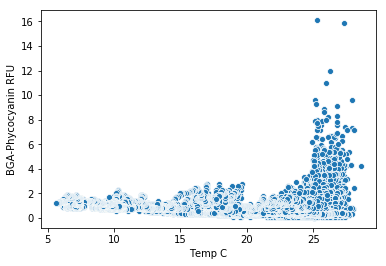

In [188]:
sns.scatterplot(x='Temp C', y='BGA-Phycocyanin RFU', data=df)

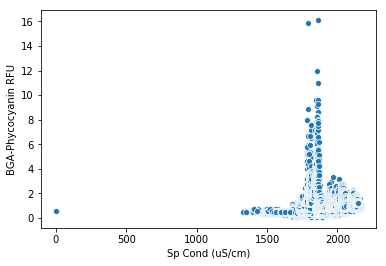

In [189]:
sns.scatterplot(x='Sp Cond (uS/cm)', y='BGA-Phycocyanin RFU', data=df)

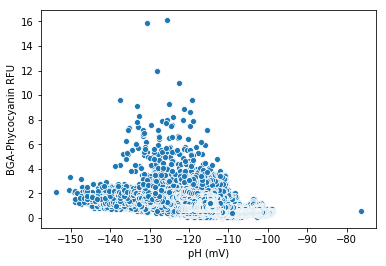

In [190]:
sns.scatterplot(x='pH (mV)', y='BGA-Phycocyanin RFU', data=df)

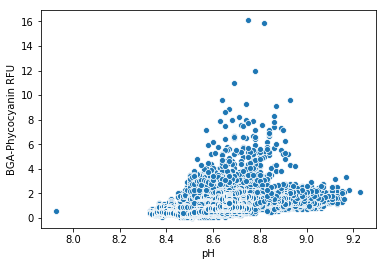

In [191]:
sns.scatterplot(x='pH', y='BGA-Phycocyanin RFU', data=df)

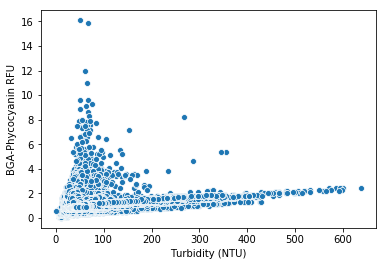

In [192]:
sns.scatterplot(x='Turbidity (NTU)', y='BGA-Phycocyanin RFU', data=df)

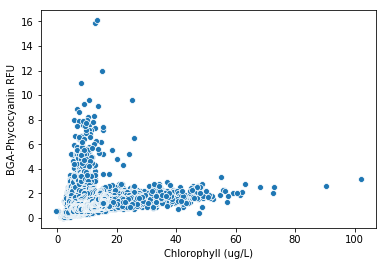

In [193]:
sns.scatterplot(x='Chlorophyll (ug/L)', y='BGA-Phycocyanin RFU', data=df)

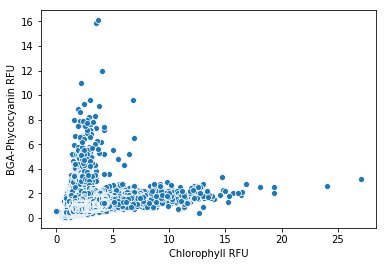

In [194]:
sns.scatterplot(x='Chlorophyll RFU', y='BGA-Phycocyanin RFU', data=df)

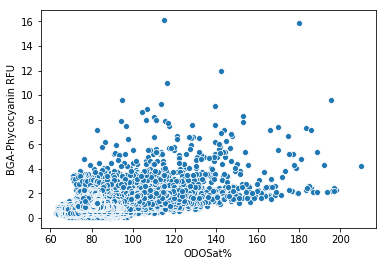

In [195]:
sns.scatterplot(x='ODOSat%', y='BGA-Phycocyanin RFU', data=df)

## Classified Scatter Plot Matrix

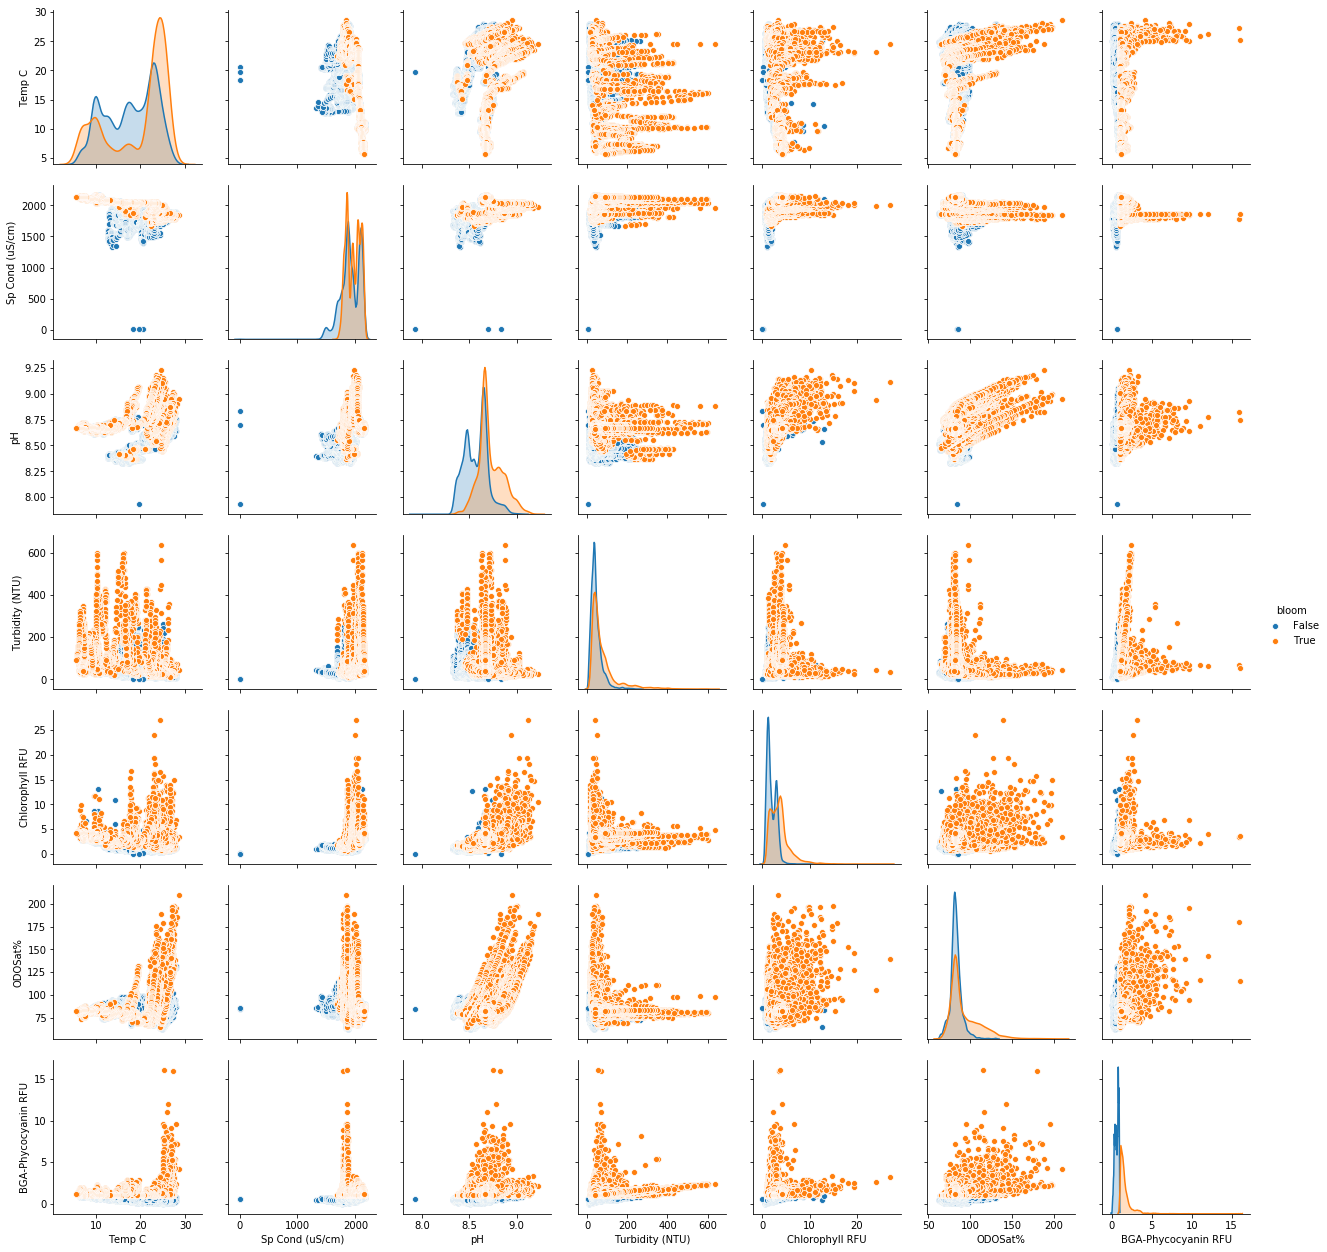

In [196]:
# Create a scatter matrix plot without colinear variables (i.e. ODO and ODOSat%) variables and the datetime column
plot_df = df.drop(columns=['Date (mm.dd.yyyy)', 'Time 24hr', 'bloom', 'datetime', 'ODO (mg/L)', 'pH (mV)', 'Chlorophyll (ug/L)'])
# categorized_scatter_plots(df, plot_df.columns, 'bloom')
sns.pairplot(data=df, hue='bloom', vars=plot_df.columns)

## Variables over time

In [197]:
# Scale the data for visual line plot comparisons. 
scaled_columns = ['Temp C', 'Sp Cond (uS/cm)', 'pH (mV)', 'pH', 'Turbidity (NTU)', 'Chlorophyll (ug/L)', 'Chlorophyll RFU', 
                  'ODOSat%', 'ODO (mg/L)', 'BGA-Phycocyanin RFU']
scaler = StandardScaler()
for column in scaled_columns:
    scaled_data = scaler.fit_transform(df[[column]].values)
    df[column] = pd.DataFrame(scaled_data)
df.describe()

,Temp C,Sp Cond (uS/cm),pH (mV),pH,Turbidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU
count,1.894700e+04,1.894700e+04,1.894700e+04,1.894700e+04,1.894700e+04,1.894700e+04,1.894700e+04,1.894700e+04,1.894700e+04,1.894700e+04
mean,-1.263593e-15,4.351685e-15,-3.906090e-15,1.008383e-14,-9.953099e-16,-4.237188e-15,-6.359986e-14,-1.055582e-15,4.765515e-16,-1.492474e-14
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,-2.096120e+00,-1.271811e+01,-4.111290e+00,-4.777772e+00,-1.052151e+00,-1.515249e+00,-1.539987e+00,-1.758594e+00,-2.353763e+00,-1.339221e+00
25%,-9.435848e-01,-5.636793e-01,-4.449777e-01,-7.024226e-01,-5.177392e-01,-7.417451e-01,-7.186825e-01,-5.116204e-01,-7.188838e-01,-6.556040e-01
50%,2.986102e-01,3.580730e-02,1.233565e-01,1.126473e-01,-2.927335e-01,-2.002928e-01,-1.907010e-01,-2.796252e-01,-7.744811e-02,-1.087105e-01
75%,8.381989e-01,8.988045e-01,5.245336e-01,4.522598e-01,1.403430e-01,4.339800e-01,4.546097e-01,1.336162e-01,8.377711e-01,3.014596e-01
max,1.643506e+00,1.518054e+00,4.491729e+00,4.052152e+00,1.059249e+01,1.431063e+01,1.429946e+01,8.891433e+00,6.250862e+00,2.067324e+01


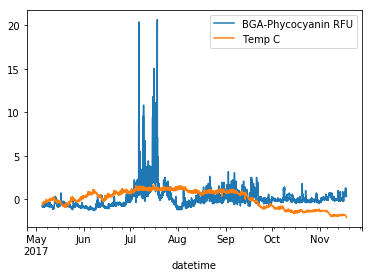

In [198]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'Temp C'])

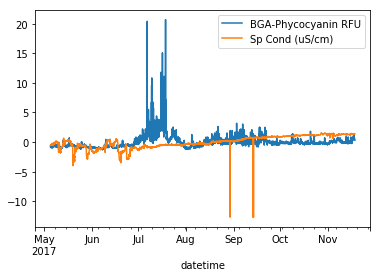

In [199]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'Sp Cond (uS/cm)'])

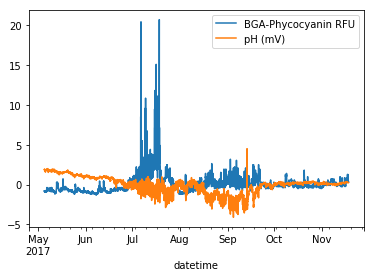

In [200]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'pH (mV)'])

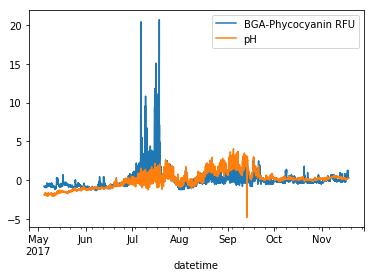

In [201]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'pH'])

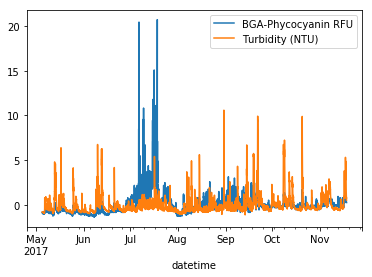

In [202]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'Turbidity (NTU)'])

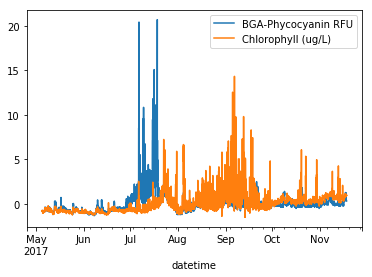

In [203]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'Chlorophyll (ug/L)'])

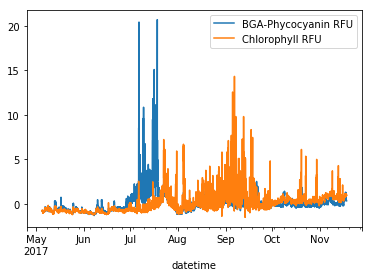

In [204]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'Chlorophyll RFU'])

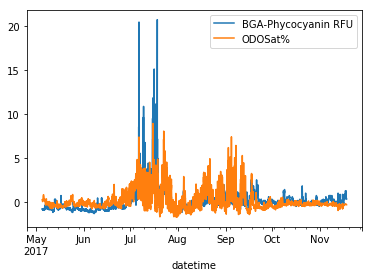

In [205]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'ODOSat%'])